|<img style="float:left;" src="http://pierreproulx.espaceweb.usherbrooke.ca/images/usherb_transp.gif"> |Pierre Proulx, ing, professeur|
|:---|:---|
|Département de génie chimique et de génie biotechnologique |** GCH200-Phénomènes d'échanges I **|

### Section 10.3, Conduction de la chaleur avec une source nucléaire

>Cet exemple est assez complexe, il sera très utile tant sur le plan de l'application des bilans thermiques que dans l'utilisation de ** SYMPY ** pour effectuer le travail de solution mathématiques et des manipulations algébriques. Les développements faits dans Transport Phenomena sont à étudier en parallèlle.
La figure suivante extraite de Transport Phenomena illustre le problème à traiter. Utilisez le livre pour suivre les développements en détail, vous constaterez facilement que les solutions effectuées avec ** SYMPY ** génèrent initialement des noms de constantes d'intégration différentes, on les renommera dans le ** NOTEBOOK ** pour garder la similarité entre les expressions utilisées dans le texte de référence et ce document, afin de rendre les comparaisons plus faciles.
<img src='http://pierreproulx.espaceweb.usherbrooke.ca/images/Chap-10-Section-10-3.png'>
Cet exemple peut servir de base à tout autre problème de conduction de chaleur en présence de génération de chaleur, que ce soit par réaction chimique ou biochimique, source électrique ou magnétique.

Voyons dans ce qui suit un résumé de l'analyse qui est faite dans Transport Phenomena. Vous verrez dans ce qui suivra qu'en utilisant le solver ** SOLVE ** de ** SYMPY ** , on posera les 4 conditions aux limites simultanément, pas une à la fois comme dans le livre. On profite de la force du calcul symbolique de ** SYMPY **

http://pierreproulx.espaceweb.usherbrooke.ca/images/GCH200_Ch10_3_resume.pdf

>Maintenant regardons comment on procède en utilisant le calcul formel de ** SYMPY ** pour effectuer les manipulations, intégrales, solutions d'équations différentielles et recherche des constantes provenant des conditions aux limites. On terminera en tracant un profil de température dans les deux milieux.

In [1]:
#
# Pierre Proulx
#
# Préparation de l'affichage et des outils de calcul symbolique
#
import sympy as sp
from IPython.display import *
sp.init_printing(use_latex=True)

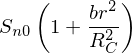

In [2]:
# Paramètres, variables et fonctions
S_n,r,b,R_F,R_C,S_n0,delta_r,T_0=sp.symbols('S_n,r,b,R_F,R_C,S_n0,delta_r,T_0')                                                            
k_C,k_F=sp.symbols('k_C,k_F')             
q_F=sp.symbols('q_F')           # Notation de Transport Phenomena
T_F=sp.Function('T_F')(r) 
q_C=sp.symbols('q_C')
T_C=sp.Function('T_C')(r)
S_n=S_n0*(1+b*(r/R_C)**2)
display(S_n)

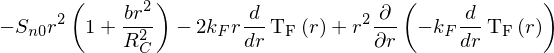

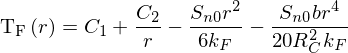

In [3]:
#
# Résultat du bilan dans la sphère fissible d'uranium, solution
#
eqF=(sp.diff(q_F(r)*r**2,r)-S_n*r**2)
# On substitue la loi de Fourier pour trouver le profil de température
eq_TF=eqF.subs(q_F(r),-k_F*sp.diff(T_F,r))
display(eq_TF)
T_F=sp.dsolve(eq_TF,T_F)
display( T_F)

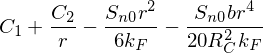

In [4]:
T_F=T_F.rhs # Voyez ci-dessous pourquoi on utilise .rhs (right hand side) de l'expression
display(T_F)
q_F=-k_F*sp.diff(T_F,r)

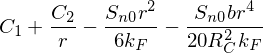

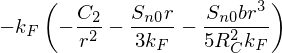

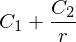

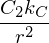

In [5]:
#
# Bilan dans l'aluminium, la solution est plus simple évidemment car il n'y a pas de source
#
eqC=sp.diff(q_C(r)*r**2,r)
eq_TC=eqC.subs(q_C(r),-k_C*sp.diff(T_C,r))
T_C=sp.dsolve(eq_TC,T_C)
T_C=T_C.rhs
q_C=-k_C*sp.diff(T_C,r)
display(T_F)
display(q_F)
display(T_C)
display(q_C)

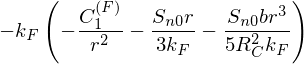

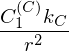

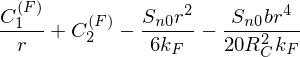

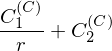

In [6]:
#
# Les noms des constantes doivent être changés car sympy a réutilisé les noms C1 et C2 dans les 2 régions.
# Remarquez en plus que la nomenclature 1 et 2 est inversée par rapport au livre.
#
# Pour comparaison, on utilisera les mêmes noms que dans Transport Phenomena, ainsi
#  C_1 de l'uranium devient C_2^(F), C_1 de l'alu devient C_2^(F), etc...
# 
T_F=T_F.subs(sp.symbols('C1'),sp.symbols('C_2^(F)'))
T_F=T_F.subs(sp.symbols('C2'),sp.symbols('C_1^(F)'))
q_F=q_F.subs(sp.symbols('C2'),sp.symbols('C_1^(F)'))
T_C=T_C.subs(sp.symbols('C1'),sp.symbols('C_2^(C)'))
T_C=T_C.subs(sp.symbols('C2'),sp.symbols('C_1^(C)'))
q_C=q_C.subs(sp.symbols('C2'),sp.symbols('C_1^(C)'))
#
display(q_F)
display(q_C)
display(T_F)
display(T_C)

On peut directement ces 4 équations à 4 inconnues en posant les 4 conditions aux limites comme ci-dessous. On n'aura pas de manipulations autres que de poser les conditions, effectuer la solution et ensuite substituer dans les solutions générales (ci-haut). 

### Attention, ici la fonction ** SOLVE ** de SYMPY retourne une liste ([ ]) qui contient un seul élément, notre dictionnaire contenant la solution. Il faut alors sortir le dictionnaire contenant la solutionde la liste en référant à  l'élément [0]. Regardez-bien dessous. Notez que ** SOLVE** ne retourne pas toujours une liste, seulement quand il détecte qu'il pourrait y avoir des solutions multiples, quand il voit des équations non-linéaires.

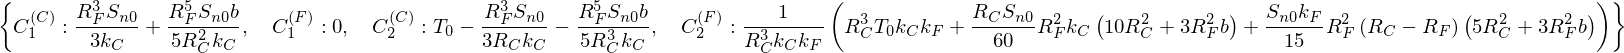

In [7]:
condition_0=sp.Eq(q_F.subs(r,0),0)                     # flux nul au centre
condition_1=sp.Eq(q_F.subs(r,R_F)-q_C.subs(r,R_F),0)   # flux égaux à l'interface
condition_2=sp.Eq(T_C.subs(r,R_C)-T_0,0)               # température égale à T_0 en r=R_C
condition_3=sp.Eq(T_F.subs(r,R_F)-T_C.subs(r,R_F),0)   # températures égales à l'interface
conditions=(condition_0,condition_1,condition_2,condition_3)
constantes=(sp.symbols('C_1^(C)'),sp.symbols('C_2^(C)'),sp.symbols('C_1^(F)'),sp.symbols('C_2^(F)'))
constantes=sp.solve(conditions,constantes,dict=True)     
display(constantes[0])

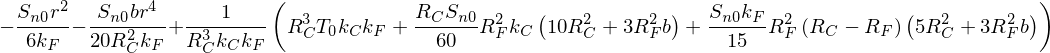

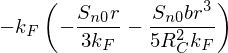

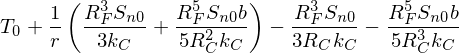

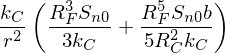

In [8]:
T_F=T_F.subs(constantes[0])
q_F=q_F.subs(constantes[0])
T_C=T_C.subs(constantes[0])
q_C=q_C.subs(constantes[0])
display(T_F)
display(q_F)
display(T_C)
display(q_C)

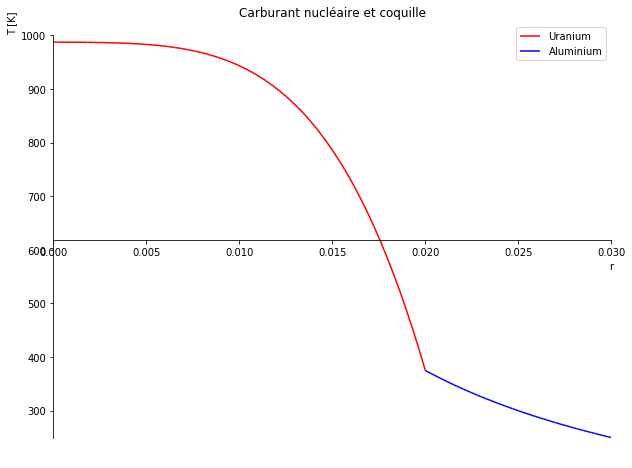

In [9]:
### Comparer avec le profil montré sur la figure 10.3-1 en utilisant des valeurs estimées au PIF!
dico={'k_F':22,'k_C':140,'b':100,'R_F':0.02,'R_C':0.025,'S_n0':1e7,'T_0':300}
T_Fplot=T_F.subs(dico)
T_Cplot=T_C.subs(dico)
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=10,8
p = sp.plot((T_Fplot,(r,0,0.02)),(T_Cplot,(r,0.02,0.03))
            ,legend=True,xlabel='r',ylabel='T [K]'
            , title='Carburant nucléaire et coquille', show=False) 
p[0].line_color = 'red'
p[0].label='Uranium'
p[1].line_color = 'blue'
p[1].label='Aluminium'
p.show()